### Knock21: 店舗を絞り込んで可視化できるようにしてみよう

In [4]:
# 注文 Data 4月分、店舗情報、Area 情報を結合
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')
order_data = pd.read_csv('tbl_order_202004.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# Master にない Code に対応した文字列を設定
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = "デリバリー"
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = "お持ち帰り"

order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払済'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [5]:
# ipywidgets の機能を実装し、Dropdown で店舗を選べるようにしていく
from ipywidgets import Dropdown


def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[
        (order_data['store_name'] == val['new'])
        & (order_data['status'].isin([1, 2]))
        ]
    display(pick_data.head())


store_list = m_store['store_name'].tolist()
dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(index=1, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
38,84034264,2,C80963257,14,77682610,2020-04-01 11:03:03,2020-04-01 11:26:03,0,2154,2,あきる野店,TK,東京,東京,デリバリー,お渡し済
678,50000478,2,C63288793,30,91377121,2020-04-01 11:57:57,2020-04-01 12:29:57,1,1900,1,あきる野店,TK,東京,東京,お持ち帰り,お支払済
1299,72717258,2,C20298067,52,72770525,2020-04-01 12:51:51,2020-04-01 13:10:51,0,3742,2,あきる野店,TK,東京,東京,デリバリー,お渡し済
1686,70800161,2,C75933979,12,68267480,2020-04-01 13:25:25,2020-04-01 14:00:25,0,4144,2,あきる野店,TK,東京,東京,デリバリー,お渡し済
1976,96979365,2,C70904599,84,62376077,2020-04-01 13:49:49,2020-04-01 14:42:49,0,2316,2,あきる野店,TK,東京,東京,デリバリー,お渡し済


Dropdown(index=13, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店',…

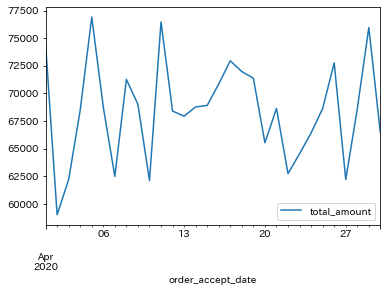

In [6]:
# 抽出した各店舗の注文 Data を可視化（折れ線 Graph 化）していく
import matplotlib.pyplot as plt
import japanize_matplotlib


def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[
        (order_data['store_name'] == val['new'])
        & (order_data['status'].isin([1, 2]))
        ]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()


dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)